In [54]:
from sklearn.datasets import make_classification, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [55]:
def generate_complex_data(n_samples=1000, n_features=100, n_informative=75, n_redundant=25, n_classes=3, noise=0.05):
    """
    Generates a complex synthetic dataset.
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_informative, 
                               n_redundant=n_redundant, n_classes=n_classes, n_clusters_per_class=1, 
                               flip_y=noise, class_sep=1, hypercube=True, random_state=42)
    # Add noise
    X += noise * np.random.randn(*X.shape)
    
    return X, y

def generate_multi_modal_data():
    X, y = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=3, random_state=0)
    return X, y

X_complex, y_complex = generate_complex_data()
X_multi_modal, y_multi_modal = generate_multi_modal_data()

scaler = StandardScaler()
X_complex_scaled = scaler.fit_transform(X_complex)
X_multi_modal_scaled = scaler.fit_transform(X_multi_modal)


In [56]:
def build_model(optimizer, input_dim, output_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [57]:
def train_evaluate_model(X, y, optimizer, optimizer_name, epochs=50, batch_size=32, validation_split=0.2):
    model = build_model(optimizer, X.shape[1], len(np.unique(y)))
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=validation_split)
    print(f"Training with {optimizer_name}: Training Accuracy - {history.history['accuracy'][-1]:.4f}, Validation Accuracy - {history.history['val_accuracy'][-1]:.4f}")
    return model, history

# Train and get models and histories for different optimizers on Classification Data
model_adam_complex, history_adam_complex = train_evaluate_model(X_complex_scaled, y_complex, Adam(learning_rate=0.001), "Adam")

model_rmsprop_complex, history_rmsprop_complex = train_evaluate_model(X_complex_scaled, y_complex, RMSprop(learning_rate=0.001), "RMSProp")

# Train and get models and histories for different optimizers on Multi-Modal Data
model_adam_multi, history_adam_multi = train_evaluate_model(X_multi_modal_scaled, y_multi_modal, Adam(learning_rate=0.001), "Adam")
model_rmsprop_multi, history_rmsprop_multi = train_evaluate_model(X_multi_modal_scaled, y_multi_modal, RMSprop(learning_rate=0.001), "RMSProp")


Training with Adam: Training Accuracy - 1.0000, Validation Accuracy - 0.8650


Training with RMSProp: Training Accuracy - 1.0000, Validation Accuracy - 0.8750


Training with Adam: Training Accuracy - 0.9825, Validation Accuracy - 0.9950
Training with RMSProp: Training Accuracy - 0.9837, Validation Accuracy - 0.9850


In [58]:
y_pred_adam_complex = np.argmax(model_adam_complex.predict(X_complex_scaled), axis=1)
y_pred_sgd_complex = np.argmax(model_sgd_complex.predict(X_complex_scaled), axis=1)
y_pred_rmsprop_complex = np.argmax(model_rmsprop_complex.predict(X_complex_scaled), axis=1)

y_pred_adam_multi = np.argmax(model_adam_multi.predict(X_multi_modal_scaled), axis=1)
y_pred_sgd_multi = np.argmax(model_sgd_multi.predict(X_multi_modal_scaled), axis=1)
y_pred_rmsprop_multi = np.argmax(model_rmsprop_multi.predict(X_multi_modal_scaled), axis=1)



32/32 [==============================] - 0s 479us/step


In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_final_accuracy_bar_chart(histories, labels, title):
    accuracies = [history.history['accuracy'][-1] for history in histories]
    sns.barplot(x=labels, y=accuracies)
    plt.title(title)
    plt.ylabel('Final Accuracy')
    plt.xlabel('Optimizer')

    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

import matplotlib.pyplot as plt

def plot_accuracy_loss(history, title):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training acc')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



# Accuracy-Loss

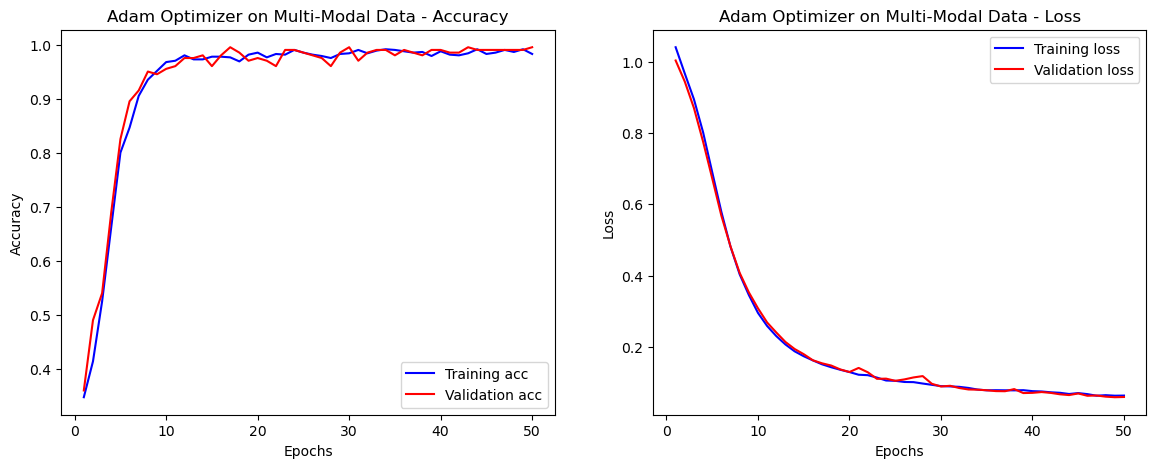

In [61]:
plot_accuracy_loss(history_adam_multi, 'Adam Optimizer on Multi-Modal Data')

# Accuracy Bar Charts

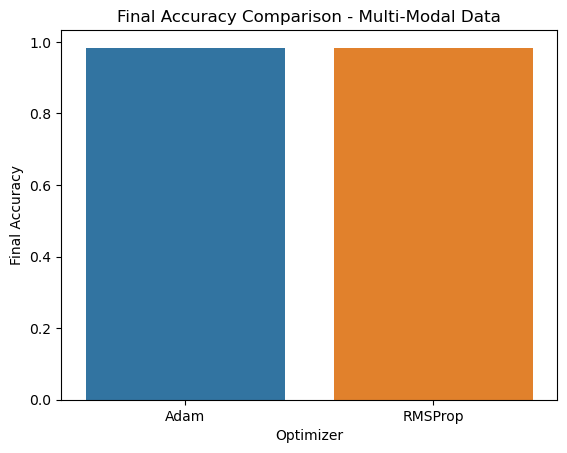

In [63]:
#Bar Chart for Multi-modal data
plot_final_accuracy_bar_chart([history_adam_multi, history_rmsprop_multi], 
                              ["Adam","RMSProp"], 
                              "Final Accuracy Comparison - Multi-Modal Data")



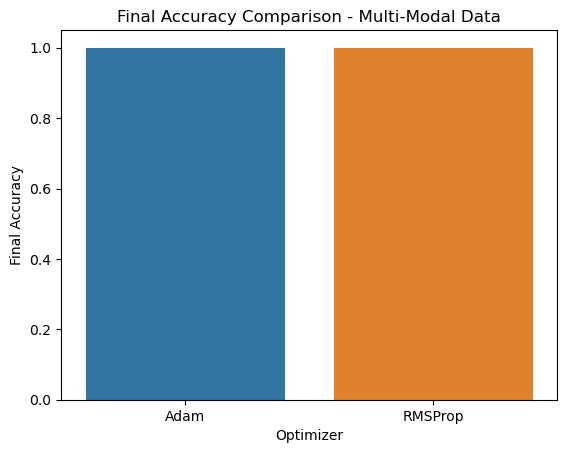

In [64]:
#Bar Chart for complex data
plot_final_accuracy_bar_chart([history_adam_complex, history_rmsprop_complex], 
                              ["Adam", "RMSProp"], 
                              "Final Accuracy Comparison - Multi-Modal Data")

# Confusion Matrix

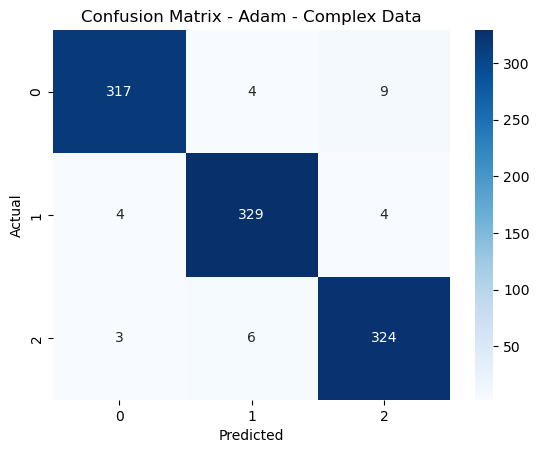

In [53]:
#Confusion matrix Adam Optimizer on complex Data
plot_confusion_matrix(y_complex, y_pred_adam_complex, "Confusion Matrix - Adam - Complex Data")



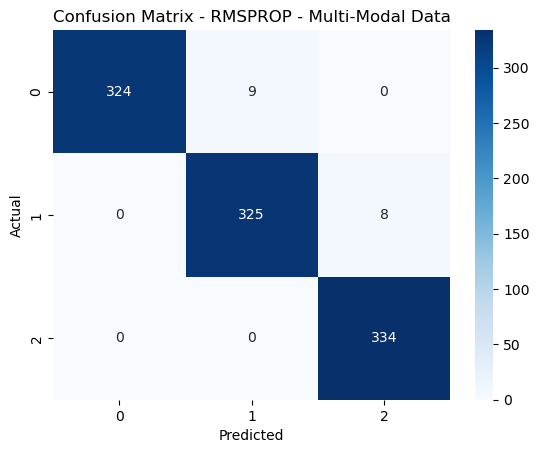

In [35]:
#Confusion matrix RMSPROP Optimizer on Multi-Modal Data
plot_confusion_matrix(y_multi_modal, y_pred_rmsprop_multi, "Confusion Matrix - RMSPROP - Multi-Modal Data")